# Context
**Dataset: Estimation of Obesity Levels Based On Eating Habits and Physical Condition**  
This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.
### Additional info
The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

[Source](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition) (2019)

# Data exploration

## Header

In [1]:
import numpy as np # algèbre linéaire
np.random.seed(42)

import pandas as pd # traitement des données, I/O de fichier CSV (par ex. pd.read_csv)
import seaborn as sns # bibliothèque de tracé qui utilise matplot
import matplotlib.pyplot as plt # pour tracer certains paramètres dans seaborn
df = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv", dtype={
  'Gender':'category',
  'CAEC':'category',
  'CALC':'category',
  'MTRANS':'category',
  'NObeyesdad':'category',
})


df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Missing values

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   float64 
 2   Height                          2111 non-null   float64 
 3   Weight                          2111 non-null   float64 
 4   family_history_with_overweight  2111 non-null   object  
 5   FAVC                            2111 non-null   object  
 6   FCVC                            2111 non-null   float64 
 7   NCP                             2111 non-null   float64 
 8   CAEC                            2111 non-null   category
 9   SMOKE                           2111 non-null   object  
 10  CH2O                            2111 non-null   float64 
 11  SCC                             2111 non-null   object  
 12  FAF                 

We can confirm that we have no missing values

## Description

In [3]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [4]:
df.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [5]:
def get_value_counts(cols):
    for col in cols:
        yield df[col].value_counts()
        
print(list(get_value_counts(['Gender', 'CAEC', 'CALC', 'MTRANS', 'NObeyesdad'])))

[Male      1068
Female    1043
Name: Gender, dtype: int64, Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64, Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64, Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64, Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64]


# Display Data

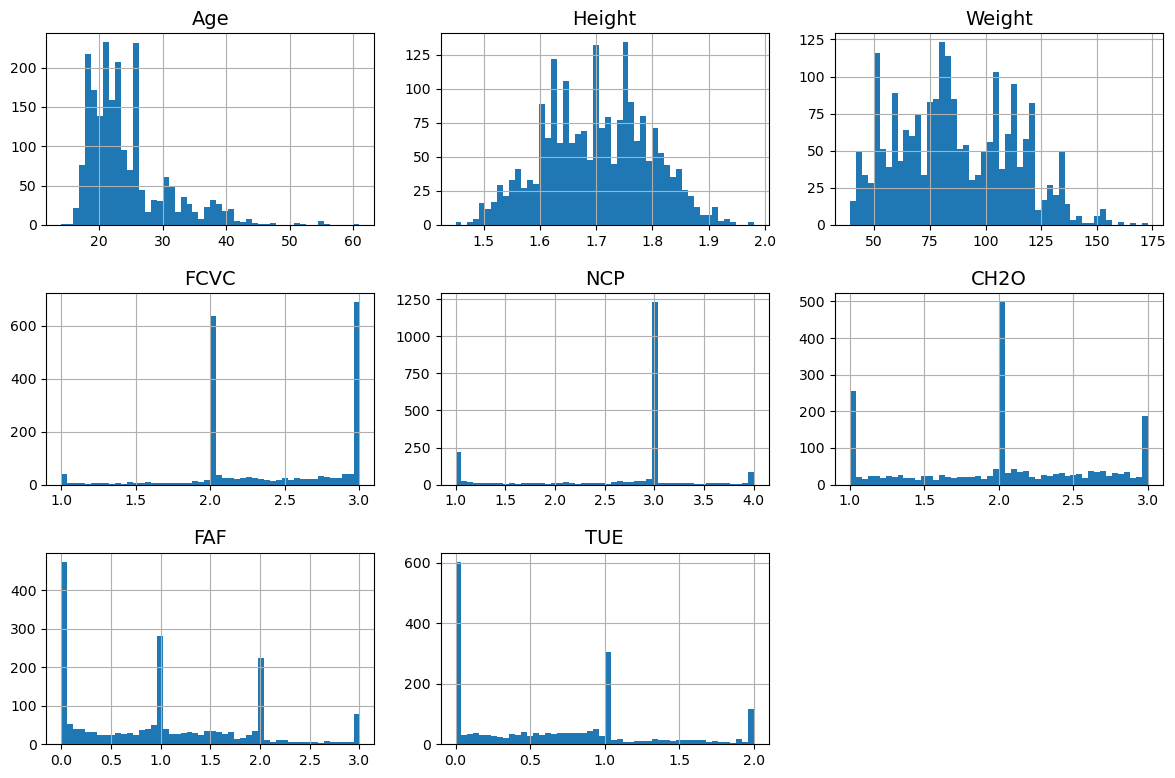

In [12]:
def save_fig(fig_id, fig_extension="png", resolution=300):
    path = "./figures/" + f"{fig_id}.{fig_extension}"
    plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))
save_fig("Histogramme Données")  # extra code
plt.show()

# Correlations

We're looking for correlations in the data

In [22]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE
Age,1.00,-0.03,0.20,0.21,0.06,0.02,-0.04,0.09,-0.05,-0.12,-0.14,-0.30
Height,-0.03,1.00,0.46,0.25,0.18,-0.04,0.24,0.06,0.21,-0.13,0.29,0.05
Weight,0.20,0.46,1.00,0.50,0.27,0.22,0.11,0.03,0.20,-0.20,-0.05,-0.07
family_history_with_overweight,0.21,0.25,0.50,1.00,0.21,0.04,0.07,0.02,0.15,-0.19,-0.06,0.02
FAVC,0.06,0.18,0.27,0.21,1.00,-0.03,-0.01,-0.05,0.01,-0.19,-0.11,0.07
FCVC,0.02,-0.04,0.22,0.04,-0.03,1.00,0.04,0.01,0.07,0.07,0.02,-0.10
NCP,-0.04,0.24,0.11,0.07,-0.01,0.04,1.00,0.01,0.06,-0.02,0.13,0.04
SMOKE,0.09,0.06,0.03,0.02,-0.05,0.01,0.01,1.00,-0.03,0.05,0.01,0.02
CH2O,-0.05,0.21,0.20,0.15,0.01,0.07,0.06,-0.03,1.00,0.01,0.17,0.01
SCC,-0.12,-0.13,-0.20,-0.19,-0.19,0.07,-0.02,0.05,0.01,1.00,0.07,-0.01


Corrélations Height/Weight et Weight/familiy_history

# Data pre-processing

## Pipeline overview

- Delete family history (too corelated)
- Remove outliers
- Convert FCVC, NCP, CH2O, FAF, TUE in categorials values
- Apply one hot encoding to categorial values of cardinality > 2
- Normalize / Standadize numercal values

In [7]:
def convert_yes_to_bool(df, columns_names):
    for col in columns_names:
        df[col] = df[col].apply(lambda v: v == "yes")

convert_yes_to_bool(df, ["family_history_with_overweight", "FAVC", "SMOKE", "SCC"])

On retire les valeurs aberrantes (715/2111 ca fait peut etre un peu beaucoup)

In [20]:
from sklearn.ensemble import IsolationForest
df_nums = df.select_dtypes(include=[np.number])
isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(df_nums)
count = 0
for val in outlier_pred:
    if val != 1:
        count = count + 1
print(len(df_nums),count)

# df.iloc[outlier_pred == 1]

2111 715


# Create the model

## Get shuffled datasets

In [9]:
# y = df['NObeyesdad']
# x = df.drop('NObeyesdad', axis=1)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
sets_splits = []
for train_index, test_index in splitter.split(df, df["NObeyesdad"]):
    strat_train_set_n = df.iloc[train_index]
    strat_test_set_n = df.iloc[test_index]
    sets_splits.append([strat_train_set_n, strat_test_set_n])

train_set, test_set = sets_splits[0]
# Single dataset
# train_set, test_set = train_test_split(df, test_size=0.2, stratify=df["NObeyesdad"], random_state=42)
print(len(train_set), len(test_set))

1688 423
